<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/Car_Price_Prediction_ML_Project_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
#loading the data from csv file
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#empty values?
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
car_dataset['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [15]:
print(car_dataset['Fuel_Type'].value_counts())
print(car_dataset['Owner'].value_counts())
print(car_dataset['Transmission'].value_counts())
print(car_dataset['Seller_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [17]:
#encoding fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [18]:
car_dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0


In [19]:
#splitting the dataset into X and Y
X = car_dataset.drop(columns = ['Selling_Price','Car_Name'], axis = 1)
Y = car_dataset['Selling_Price']

In [21]:
#splitting the dataset to train and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(270, 7) (31, 7) (270,) (31,)


Linear Model

In [22]:
#training our Linear Regression model now
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
training_data_pred = linear_reg_model.predict(X_train)


In [26]:
#evaluating our model
error_score = metrics.r2_score(Y_train,training_data_pred)
print('Error Score on Training Data:',error_score) 

testing_data_pred = linear_reg_model.predict(X_test)
error_score2 = metrics.r2_score(Y_test,testing_data_pred)
print('Error Score on Testing Data:',error_score2) 

Error Score on Training Data: 0.8799451660493716
Error Score on Testing Data: 0.8365766715027014


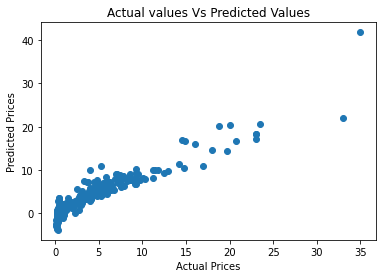

In [27]:
#visualizing the predicted training data.
plt.scatter(Y_train,training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual values Vs Predicted Values')
plt.show()

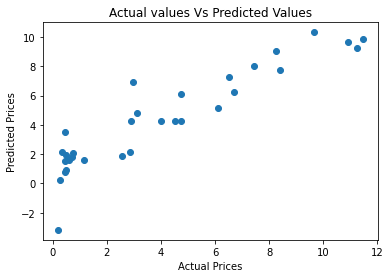

In [28]:
#visualizing the testing data predicted.
plt.scatter(Y_test,testing_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual values Vs Predicted Values')
plt.show()

Lasso Regression

In [29]:
#training our Linear Regression model now
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
training_data_pred = lasso_reg_model.predict(X_train)


In [31]:
#evaluating our model
error_score = metrics.r2_score(Y_train,training_data_pred)
print('Error Score on Training Data:',error_score) 

testing_data_pred = lasso_reg_model.predict(X_test)
error_score2 = metrics.r2_score(Y_test,testing_data_pred)
print('Error Score on Testing Data:',error_score2) 

Error Score on Training Data: 0.8427856123435795
Error Score on Testing Data: 0.8709167941173201


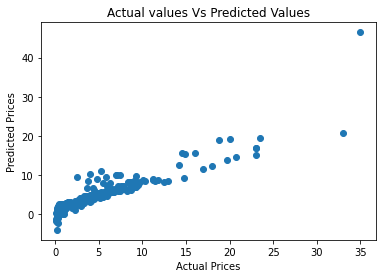

In [32]:
#visualizing the predicted training data.
plt.scatter(Y_train,training_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual values Vs Predicted Values')
plt.show()

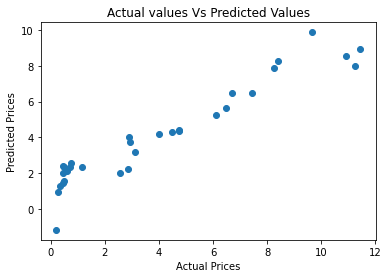

In [33]:
#visualizing the testing data predicted.
plt.scatter(Y_test,testing_data_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual values Vs Predicted Values')
plt.show()